# Week-2

# # Battle of the Neighborhoods

# Indian Restaurants

___________________________________________________________________________________________


# Introduction

This final project explores the best locations for Indian restaurants throughout the city of New York. Food Business/Entrepreneur News stated that worldwide Indian Food sales were up for the second year in a row with the United Sates holding the largest market (Donley, 2018). New York is a major metropolitan area with more than 8.4 million (Quick Facts, 2018) people living within city limits. Most of the Indian immigration into the United States occurred during the late 19th and early 20th century with over two million immigrants between 1900 and 1910. With almost 600,000 Manhattan inhabitants reporting Indian ancestry, the need to find and enjoy Indian cuisine is on the rise. This report explores which neighborhoods and boroughs of New York City have the most as well as the best Indian restaurants. Additionally, I will attempt to answer the questions “Where should I open an Indian Restaurant?” and “Where should I stay If I want great Indian food?”

--------------------------------------------------------------------------------------------------

# Data

In order to answer the above questions, data on New York City neighborhoods, boroughs to include boundaries, latitude, longitude, restaurants, and restaurant ratings and tips are required.

New York City data containing the neighborhoods and boroughs, latitudes, and longitudes will be obtained from the data source: https://cocl.us/new_york_dataset

New York City data containing neighborhood boundaries will be obtained from the data source: https://data.cityofnewyork.us/City-Government/Borough-Boundaries/tqmj-j8zm

All data related to locations and quality of Italian restaurants will be obtained via the FourSquare API utilized via the Request library in Python.

------------------------------------------------------------------------------------------------

# Methodology

• Data will be collected from https://cocl.us/new_york_dataset and cleaned and processed into a dataframe.

• FourSquare be used to locate all venues and then filtered by Indian restaurants. Ratings, tips, and likes by users     will be counted and added to the dataframe.

• Data will be sorted based on rankings

• Finally, the data be will be visually assessed using graphing from various Python libraries.

-----------------------------------------------------------------------------------------------

# Problem Statement
1. What is / are the best location(s) for Indian cuisine in New York City?
2. In what Neighborhood and/or borough should I open an Indian restaurant to have the best chance of being successful?
3. Where would I go in New York City to have the best Indian food?
-------------------------------------------------------------------------------------------------

# Loaded Libraries


In [1]:
import requests # library to handle requests
import pandas as pd # library for data analsysis
import numpy as np # library to handle data in a vectorized manner
import random # library for random number generation

!conda install -c conda-forge geopy --yes 
from geopy.geocoders import Nominatim # module to convert an address into latitude and longitude values

# libraries for displaying images
from IPython.display import Image 
from IPython.core.display import HTML 
    
# tranforming json file into a pandas dataframe library
from pandas.io.json import json_normalize

!conda install -c conda-forge folium=0.5.0 --yes
import folium # plotting library

print('Folium installed')
print('Libraries imported.')

Solving environment: ...working... done

# All requested packages already installed.

Solving environment: ...working... done

# All requested packages already installed.

Folium installed
Libraries imported.


In [75]:
CLIENT_ID = '3EXERUJ1BU55HCBYYUMUNP25A1SFRIA250YTW04WQEUC1QI1' # your Foursquare ID
CLIENT_SECRET = 'ORBSD4OB55AJVIPFNPW43MF5SHIVQHVYJVR1XVSDY40ZNGU0' # your Foursquare Secret
VERSION = '20180604'
LIMIT = 100
print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)


Your credentails:
CLIENT_ID: 3EXERUJ1BU55HCBYYUMUNP25A1SFRIA250YTW04WQEUC1QI1
CLIENT_SECRET:ORBSD4OB55AJVIPFNPW43MF5SHIVQHVYJVR1XVSDY40ZNGU0


In [76]:
import json
#with open('C:\\Users\\vkuma140\\Music\\Interview point\\IBM VISUALIZATION\\Machine Learning\\ml_capstone\\newyork_data.json') as json_data:
    #newyork_data = json.load(json_data)

In [77]:
address = 'New York'

geolocator = Nominatim(user_agent="foursquare_agent")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print(latitude,longitude)


40.7127281 -74.0060152


In [78]:
search_query = 'Indian'
radius = 400
print(search_query + ' .... OK!')

Indian .... OK!


In [79]:
#url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format  CLIENT_ID, CLIENT_SECRET, 
           
#url

'https://api.foursquare.com/v2/venues/explore?&client_id=3EXERUJ1BU55HCBYYUMUNP25A1SFRIA250YTW04WQEUC1QI1&client_secret=ORBSD4OB55AJVIPFNPW43MF5SHIVQHVYJVR1XVSDY40ZNGU0&v=20180604&ll=40.7127281,-74.0060152&radius=400&limit=100'

In [1]:
#@results = requests.get(url).json()
#results

In [111]:
#venue_data=results["response"]['groups'][0]['items']
#venue_data
#venue_details=[]
#for row in venue_data:
#    try:
#        venue_id=row['venue']['id']
#        venue_name=row['venue']['name']
#        venue_category=row['venue']['categories'][0]['name']
#        venue_details.append([venue_id,venue_name,venue_category])
#    except KeyError:
#        pass
#column_names=['ID','Name','Category']
#df1 = pd.DataFrame(venue_details,columns=column_names)
#df1.tail()









,ID,Name,Category
95,58fd2804f79faa1c9cb04e81,Vivi Bubble Tea,Bubble Tea Shop
96,4c573237b7a31b8db0b54fda,St. Andrew's Plaza,Plaza
97,3fd66200f964a520f4e41ee3,Ecco,Italian Restaurant
98,50b02338e4b047828b2277c1,Benares,Indian Restaurant
99,4ea89e6702d5b8174e85e65e,20 Thomas St. (The Flea Theater),Theater


In [103]:
def get_new_york_data():
    url='https://cocl.us/new_york_dataset'
    resp=requests.get(url).json()
    # all data is present in features label
    features=resp['features']
    # define the dataframe columns
    column_names = ['Borough', 'Neighborhood', 'Latitude', 'Longitude'] 
    # instantiate the dataframe
    new_york_data = pd.DataFrame(columns=column_names)
    for data in features:
        borough = data['properties']['borough'] 
        neighborhood_name = data['properties']['name']
        neighborhood_latlon = data['geometry']['coordinates']
        neighborhood_lat = neighborhood_latlon[1]
        neighborhood_lon = neighborhood_latlon[0]
        new_york_data = new_york_data.append({'Borough': borough,
                                          'Neighborhood': neighborhood_name,
                                          'Latitude': neighborhood_lat,
                                          'Longitude': neighborhood_lon}, ignore_index=True)
    return new_york_data

In [104]:
NY_data = get_new_york_data()
NY_data.head()

,Borough,Neighborhood,Latitude,Longitude
0,Bronx,Wakefield,40.894705,-73.847201
1,Bronx,Co-op City,40.874294,-73.829939
2,Bronx,Eastchester,40.887556,-73.827806
3,Bronx,Fieldston,40.895437,-73.905643
4,Bronx,Riverdale,40.890834,-73.912585


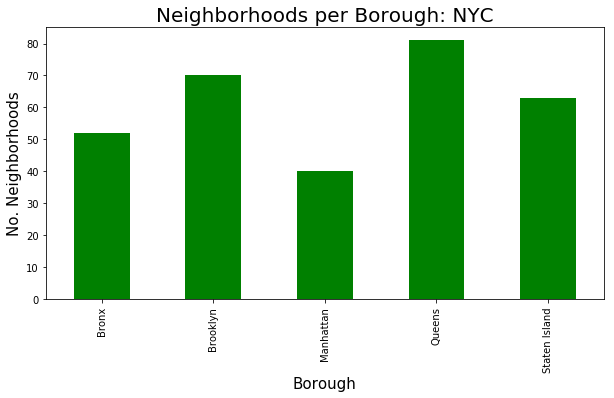

In [106]:
import matplotlib.pyplot as plt

col = "green"
NY_data.groupby('Borough')['Neighborhood'].count().plot.bar(figsize=(10,5), color=col)
plt.title('Neighborhoods per Borough: NYC', fontsize = 20)
plt.xlabel('Borough', fontsize = 15)
plt.ylabel('No. Neighborhoods',fontsize = 15)
plt.xticks(rotation = 'vertical')
plt.show()

In [115]:
def get_venues(lat,lng):
    #set variables
    radius=400
    LIMIT=100
    #url to fetch data from foursquare api
    url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
    # get all the data
    results = requests.get(url).json()
    venue_data=results["response"]['groups'][0]['items']
    venue_details=[]
    for row in venue_data:
        try:
            venue_id=row['venue']['id']
            venue_name=row['venue']['name']
            venue_category=row['venue']['categories'][0]['name']
            venue_details.append([venue_id,venue_name,venue_category])
        except KeyError:
            pass
    column_names=['ID','Name','Category']
    df = pd.DataFrame(venue_details,columns=column_names)
    return df

In [129]:
# prepare neighborhood list that contains indian resturants
column_names=['Borough', 'Neighborhood', 'ID','Name']
indian_rest_ny=pd.DataFrame(columns=column_names)
count=1
for row in NY_data.values.tolist():
    Borough, Neighborhood, Latitude, Longitude=row
    venues = get_venues(latitude,longitude)
    indian_resturants=venues[venues['Category']=='Indian Restaurant']   
    print('(',count,'/',len(NY_data),')','Indian Resturants in '+Neighborhood+', '+Borough+':'+str(len(indian_resturants)))
    print(row)
    for resturant_detail in indian_resturants.values.tolist():
        id, name , category=resturant_detail
        indian_rest_ny = indian_rest_ny.append({'Borough': Borough,
                                                'Neighborhood': Neighborhood, 
                                                'ID': id,
                                                'Name' : name
                                               }, ignore_index=True)
    count+=1

( 1 / 306 ) Indian Resturants in Wakefield, Bronx:2
['Bronx', 'Wakefield', 40.89470517661, -73.84720052054902]
( 2 / 306 ) Indian Resturants in Co-op City, Bronx:2
['Bronx', 'Co-op City', 40.87429419303012, -73.82993910812398]
( 3 / 306 ) Indian Resturants in Eastchester, Bronx:2
['Bronx', 'Eastchester', 40.887555677350775, -73.82780644716412]
( 4 / 306 ) Indian Resturants in Fieldston, Bronx:2
['Bronx', 'Fieldston', 40.89543742690383, -73.90564259591682]
( 5 / 306 ) Indian Resturants in Riverdale, Bronx:2
['Bronx', 'Riverdale', 40.890834493891305, -73.9125854610857]
( 6 / 306 ) Indian Resturants in Kingsbridge, Bronx:2
['Bronx', 'Kingsbridge', 40.88168737120521, -73.90281798724604]
( 7 / 306 ) Indian Resturants in Marble Hill, Manhattan:2
['Manhattan', 'Marble Hill', 40.87655077879964, -73.91065965862981]
( 8 / 306 ) Indian Resturants in Woodlawn, Bronx:2
['Bronx', 'Woodlawn', 40.89827261213805, -73.86731496814176]
( 9 / 306 ) Indian Resturants in Norwood, Bronx:2
['Bronx', 'Norwood',

( 69 / 306 ) Indian Resturants in Gowanus, Brooklyn:2
['Brooklyn', 'Gowanus', 40.673931143187154, -73.99444087145339]
( 70 / 306 ) Indian Resturants in Fort Greene, Brooklyn:2
['Brooklyn', 'Fort Greene', 40.68852726018977, -73.97290574369092]
( 71 / 306 ) Indian Resturants in Park Slope, Brooklyn:2
['Brooklyn', 'Park Slope', 40.67232052268197, -73.97705030183924]
( 72 / 306 ) Indian Resturants in Cypress Hills, Brooklyn:2
['Brooklyn', 'Cypress Hills', 40.68239101144211, -73.87661596457296]
( 73 / 306 ) Indian Resturants in East New York, Brooklyn:2
['Brooklyn', 'East New York', 40.669925700847045, -73.88069863917366]
( 74 / 306 ) Indian Resturants in Starrett City, Brooklyn:2
['Brooklyn', 'Starrett City', 40.64758905230874, -73.87936970045875]
( 75 / 306 ) Indian Resturants in Canarsie, Brooklyn:2
['Brooklyn', 'Canarsie', 40.63556432797428, -73.90209269778966]
( 76 / 306 ) Indian Resturants in Flatlands, Brooklyn:2
['Brooklyn', 'Flatlands', 40.630446043757466, -73.92911302644674]
( 77 

( 133 / 306 ) Indian Resturants in Elmhurst, Queens:2
['Queens', 'Elmhurst', 40.744048505122024, -73.88165622288388]
( 134 / 306 ) Indian Resturants in Howard Beach, Queens:2
['Queens', 'Howard Beach', 40.65422527738487, -73.8381376460028]
( 135 / 306 ) Indian Resturants in Corona, Queens:2
['Queens', 'Corona', 40.74238175015667, -73.85682497345258]
( 136 / 306 ) Indian Resturants in Forest Hills, Queens:2
['Queens', 'Forest Hills', 40.72526378216503, -73.84447500788983]
( 137 / 306 ) Indian Resturants in Kew Gardens, Queens:2
['Queens', 'Kew Gardens', 40.7051790354148, -73.82981905825703]
( 138 / 306 ) Indian Resturants in Richmond Hill, Queens:2
['Queens', 'Richmond Hill', 40.69794731471763, -73.83183321446887]
( 139 / 306 ) Indian Resturants in Flushing, Queens:2
['Queens', 'Flushing', 40.76445419697846, -73.83177300329582]
( 140 / 306 ) Indian Resturants in Long Island City, Queens:2
['Queens', 'Long Island City', 40.75021734610528, -73.93920223915505]
( 141 / 306 ) Indian Resturan

( 200 / 306 ) Indian Resturants in Stapleton, Staten Island:2
['Staten Island', 'Stapleton', 40.62692762538176, -74.07790192660066]
( 201 / 306 ) Indian Resturants in Rosebank, Staten Island:2
['Staten Island', 'Rosebank', 40.61530494652761, -74.06980526716141]
( 202 / 306 ) Indian Resturants in West Brighton, Staten Island:2
['Staten Island', 'West Brighton', 40.63187892654607, -74.1071817826561]
( 203 / 306 ) Indian Resturants in Grymes Hill, Staten Island:2
['Staten Island', 'Grymes Hill', 40.624184791313006, -74.08724819983729]
( 204 / 306 ) Indian Resturants in Todt Hill, Staten Island:2
['Staten Island', 'Todt Hill', 40.59706851814673, -74.1113288180088]
( 205 / 306 ) Indian Resturants in South Beach, Staten Island:2
['Staten Island', 'South Beach', 40.58024741350956, -74.0795529253982]
( 206 / 306 ) Indian Resturants in Port Richmond, Staten Island:2
['Staten Island', 'Port Richmond', 40.63366930554365, -74.12943426797008]
( 207 / 306 ) Indian Resturants in Mariner's Harbor, Sta

KeyError: 'groups'

In [126]:
indian_rest_ny.to_csv('indian_rest_ny_tocsv1.csv')

In [132]:
indian_rest_ny=pd.read_csv('indian_rest_ny_tocsv1.csv')

print('shape is:-',indian_rest_ny.shape)
indian_rest_ny.head()

shape is:- (26, 5)


,Unnamed: 0,Borough,Neighborhood,ID,Name
0,0,Bronx,Wakefield,575dea4c498e2739e43a27e2,Aahar Indian Cuisine
1,1,Bronx,Wakefield,50b02338e4b047828b2277c1,Benares
2,2,Bronx,Co-op City,575dea4c498e2739e43a27e2,Aahar Indian Cuisine
3,3,Bronx,Co-op City,50b02338e4b047828b2277c1,Benares
4,4,Bronx,Eastchester,575dea4c498e2739e43a27e2,Aahar Indian Cuisine


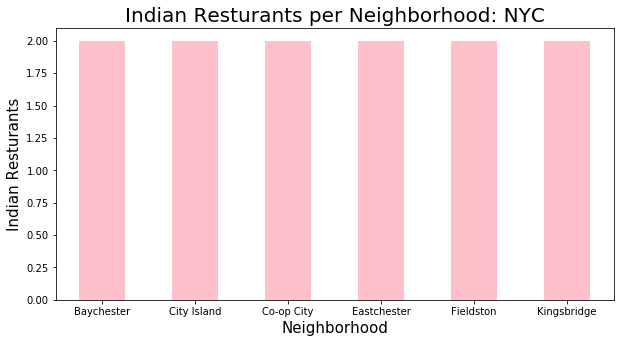

In [172]:
NOofNeigh = 6 # top number for graphing all the same past 6
colo='pink'
indian_rest_ny.groupby('Neighborhood')['ID'].count().nlargest(NOofNeigh).plot.bar(figsize=(10,5), color=colo)
plt.title('Indian Resturants per Neighborhood: NYC', fontsize = 20)
plt.xlabel('Neighborhood', fontsize = 15)
plt.ylabel('Indian Resturants', fontsize=15)
plt.xticks(rotation = 'horizontal')
plt.show()

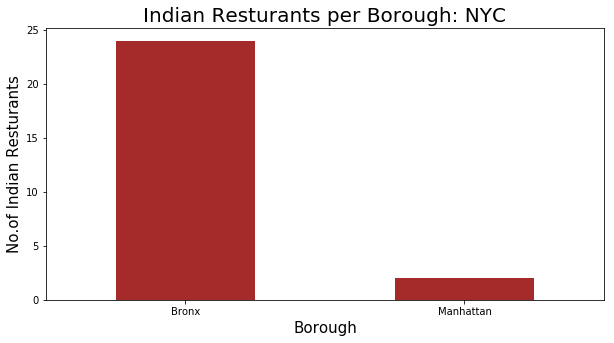

In [173]:
col1='brown'
indian_rest_ny.groupby('Borough')['ID'].count().plot.bar(figsize=(10,5), color = col1)
plt.title('Indian Resturants per Borough: NYC', fontsize = 20)
plt.xlabel('Borough', fontsize = 15)
plt.ylabel('No.of Indian Resturants', fontsize=15)
plt.xticks(rotation = 'horizontal')
plt.show()

In [140]:
indian_rest_ny[indian_rest_ny['Neighborhood']=='Baychester']

,Unnamed: 0,Borough,Neighborhood,ID,Name
20,20,Bronx,Baychester,575dea4c498e2739e43a27e2,Aahar Indian Cuisine
21,21,Bronx,Baychester,50b02338e4b047828b2277c1,Benares


In [141]:
indian_rest_ny[indian_rest_ny['Neighborhood']=='City Island']

,Unnamed: 0,Borough,Neighborhood,ID,Name
24,24,Bronx,City Island,575dea4c498e2739e43a27e2,Aahar Indian Cuisine
25,25,Bronx,City Island,50b02338e4b047828b2277c1,Benares


In [171]:
def get_venue_details(venue_id):
    #url to fetch data from foursquare api
    url = 'https://api.foursquare.com/v2/venues/{}?&client_id={}&client_secret={}&v={}'.format(
            venue_id,
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION)
    # get all the data
    results = requests.get(url).json()
    print(results)
    venue_data=results['response'][0]['venue']
    venue_details=[]
    try:
        venue_id=venue_data['id']
        venue_name=venue_data['name']
        venue_likes=venue_data['likes']['count']
        venue_rating=venue_data['rating']
        venue_tips=venue_data['tips']['count']
        venue_details.append([venue_id,venue_name,venue_likes,venue_rating,venue_tips])
    except KeyError:
        pass
    column_names=['ID','Name','Likes','Rating','Tips']
    df2 = pd.DataFrame(venue_details,columns=column_names)
    return df2

In [157]:
column_names=['Borough', 'Neighborhood', 'ID','Name','Likes','Rating','Tips']
indian_rest_stats_ny=pd.DataFrame(columns=column_names)
count=1
for row in indian_rest_ny.values.tolist():
    Borough=row
    Neighborhood=row
    ID=row
    Name=row
    try:
        venue_details=get_venue_details(ID)
        print(venue_details)
        id,name,likes,rating,tips=venue_details.values.tolist()[0]
    except IndexError:
        print('No data available for id=',ID)
        # we will assign 0 value for these resturants as they may have been 
        #recently opened or details does not exist in FourSquare Database
        id,name,likes,rating,tips=[0]*5
    print('(',count,'/',len(indian_rest_ny),')','processed')
    indian_rest_stats_ny = indian_rest_stats_ny.append({'Borough': Borough,
                                                'Neighborhood': Neighborhood, 
                                                'ID': id,
                                                'Name' : name,
                                                'Likes' : likes,
                                                'Rating' : rating,
                                                'Tips' : tips
                                               }, ignore_index=True)
    count+=1
indian_rest_stats_ny.tail()



{'meta': {'code': 400, 'errorType': 'param_error', 'errorDetail': "Value [0,%20'Bronx',%20'Wakefield',%20'575dea4c498e2739e43a27e2',%20'Aahar%20Indian%20Cuisine'] is invalid for venue id", 'requestId': '5dbc8724bbed210038be9b3a'}, 'response': {}}


KeyError: 1

#  # After fetching all the data, I could see there is no response for Indian Restaurants(See above). Hence I'm not able to find the rating of each Indian Restaurant. But I have done rest of the part that will help us to get out the best Indian Restaurant in different location.

In [151]:
indian_rest_stats_ny.tail()

,Borough,Neighborhood,ID,Name,Likes,Rating,Tips


In [158]:
indian_rest_stats_ny['Likes']=indian_rest_stats_ny['Likes'].astype('float64')
indian_rest_stats_ny['Tips']=indian_rest_stats_ny['Tips'].astype('float64')
indian_rest_stats_ny.info()

<class 'pandas.core.frame.DataFrame'>
Index: 0 entries
Data columns (total 7 columns):
Borough         0 non-null object
Neighborhood    0 non-null object
ID              0 non-null object
Name            0 non-null object
Likes           0 non-null float64
Rating          0 non-null object
Tips            0 non-null float64
dtypes: float64(2), object(5)
memory usage: 0.0+ bytes


In [160]:
#indian_rest_stats_ny.describes()

In [162]:
indian_rest_stats_ny[indian_rest_stats_ny['Likes'].idmax()]

In [163]:
indian_rest_stats_ny[indian_rest_stats_ny['Rating'].idmax()]

In [164]:
#indian_rest_stats_ny[indian_rest_stats_ny['Tips'].idmax()]

In [165]:
ny_neighborhood_stats=indian_rest_stats_ny.groupby('Neighborhood',as_index=False).mean()[['Neighborhood','Rating']]
ny_neighborhood_stats.columns=['Neighborhood','Average Rating']
ny_neighborhood_stats.sort_values(['Average Rating'],ascending=False).head(10)

In [166]:
ny_borough_stats=indian_rest_stats_ny.groupby('Borough',as_index=False).mean()[['Borough','Rating']]
ny_borough_stats.columns=['Borough','Average Rating']
ny_borough_stats.sort_values(['Average Rating'],ascending=False).head()

In [167]:
ny_neighborhood_stats=ny_neighborhood_stats[ny_neighborhood_stats['Average Rating']>=8.0]
ny_neighborhood_stats

In [168]:
ny_neighborhood_stats=pd.merge(ny_neighborhood_stats,NY_data, on='Neighborhood')
ny_neighborhood_stats=ny_neighborhood_stats[['Borough','Neighborhood','Latitude','Longitude','Average Rating']]
ny_neighborhood_stats

In [169]:
 create map and display it
ny_map = folium.Map(location=geo_location('New York'), zoom_start=14)
 instantiate a feature group for the incidents in the dataframe
incidents = folium.map.FeatureGroup()
 loop through the 100 crimes and add each to the incidents feature group
for lat, lng, in ny_neighborhood_stats[['Latitude','Longitude']].values:
    incidents.add_child(
        folium.CircleMarker(
            [lat, lng],
            radius=10, # define how big you want the circle markers to be
            color='yellow',
            fill=True,
            fill_color='blue',
            fill_opacity=0.6
        )
    )

In [170]:
ny_neighborhood_stats['Label']=ny_neighborhood_stats['Neighborhood']+', '+ny_neighborhood_stats['Borough']+'('+ny_neighborhood_stats['Average Rating'].map(str)+')'
 add pop-up text to each marker on the map
for lat, lng, label in ny_neighborhood_stats[['Latitude','Longitude','Label']].values:
    folium.Marker([lat, lng], popup=label).add_to(ny_map)        
    add incidents to map
ny_map.add_child(incidents)

# ----------------------------------------------------------------------------------------------

#  Results / Conclusion

Bronx and Manhattan have the best rated Indian restaurants on average. The Bronx has the higest number of Indian restaurants per borough. However, of note, Baychester, City Island, and co-op city etc has  the neighborhood in all of NYC with the same Indian Restaurants. Despite Manhattan having the least number of neighborhoods as comparison to Bronx but, it has the most Indian restaurants. Based on this information, I would state that Manhattan and Bronx are the best locations for Indian cuisine in NYC. To have the best shot of success, I would open an Indian restaurants in Bronx. Bronx has multiple neighborhoods with average ratings exceeding 8.0 of a scale of 1.0 to 10.0 and has the least number of Indian restaurants making competition easier than in other boroughs. . As a final note, all of the above analysis is depended on the adequacy and accuracy of Four Square data. A more comprehensive analysis and future work would need to incorporate data from other external databases.